In [32]:
from HDF.HDFData import HDFArray
import matplotlib.pyplot as plt
import peakdetect as pkd
import os.path
import math
from Analyzer import *
path = './FilteredData/'

In [33]:
file = HDFArray(path + '1.h5')
eeg = file.getChannelTable('EEG')[1]
ecg = file.getChannelTable('ECG')[1]
pnvm = file.getChannelTable('PNVM')[1]
fd = file.getChannelTable('FD')[1]
track = file.getChannelTable('TRACK_MARKERS')[1]

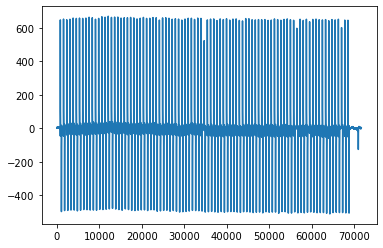

In [34]:
# Рассмотрим канал FD
plt.plot(fd)

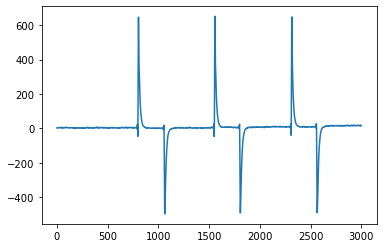

In [35]:
# Визуализируем данные на маленьком интервале
plt.plot(fd[0:3000])
# Наблюдаем пики локальных максимумов и минимумов
# Такие всплески сигнала соответствуют включению синхростимула
# Можно взять интервалы от одного всплеска до другого, то есть от одного появления объекта на экране
# до следующего появления объекта.

In [36]:
count_synchrostimuls = 0
for signal in track:
    if signal[1] == 16000:
        count_synchrostimuls+=1
print('Количество включений синхростимула = ', count_synchrostimuls)

Количество включений синхростимула =  92


In [37]:
_max, _min = pkd.peakdetect(fd, None, 50, 50)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]

In [38]:
print('Количество всплесков на канале FD = ', len(ym))
# Видим, что количество подсчитанных синхростимулов и всплесков на сигнале совпадает
# Однако стоит отметить, что на других файлах есть разница в 1-2 единицы
# Также есть файлы с существенной разницей
# Последние не будем учитывать ввиду их загрязнености, а небольшую разницу будет убирать путем
# Обрезания сигнала

Количество всплесков на канале FD =  92


In [42]:
e = list(eeg)



In [43]:
e

[array([-38.8125,   2.1875,  14.9375, -41.1875, -83.6875,   1.6875,
         -7.0625,  47.9375, -14.1875,  34.9375,  19.5625,  33.0625,
         46.0625,  -1.1875, -98.6875,  30.5625,  21.1875,  26.3125,
        138.6875, -45.6875,  70.5625]),
 array([ -40.3125,    0.5625,   13.1875,  -43.9375,  -85.6875,    1.0625,
          -9.9375,   40.4375,  -17.9375,   31.6875,   17.6875,   29.1875,
          39.3125,   -5.3125, -101.6875,   28.0625,   16.3125,   17.1875,
         134.1875,  -54.6875,   61.6875]),
 array([-37.875,   2.5  ,  15.625, -42.5  , -83.625,   3.75 ,  -8.625,
         41.   , -16.5  ,  33.625,  19.875,  30.625,  39.5  ,  -4.125,
        -99.625,  30.625,  20.   ,  18.375, 136.375, -48.   ,  62.5  ]),
 array([-32.4375,   8.1875,  21.8125, -37.0625, -76.8125,  10.4375,
         -1.8125,  52.3125, -10.5625,  40.0625,  27.0625,  38.5625,
         49.8125,   1.9375, -93.4375,  38.3125,  28.6875,  29.9375,
        143.4375, -32.9375,  76.6875]),
 array([-29.625,  13.25 ,  27.62